## Regression model on tensorflow to predict 

[Numeric features + linear regression](#tag1)

[Feature selection over correlation + linear regression](#tag2)

[Add categorical features + linear regression](#tag3)

[Add categorical features + ridge regression](#tag4) (best model)

Reference https://www.kaggle.com/timoboz/test-nn-to-predict-score/notebook

<a id='tag1'></a>
### Numeric features + linear regression on Tensorflow

* Features: only numerical features
* Model: linear regression
* MSE: 2.33

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.colors as colors
from sklearn import pipeline


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from subprocess import check_output
#print(check_output(["ls", "./"]).decode("utf8"))
data = pd.read_csv("movie_metadata.csv")

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:

select_col = data.select_dtypes(['int64', 'float64']).columns.tolist()


In [4]:
scaler = Normalizer()

In [5]:
data_features_raw = scaler.fit_transform(data[select_col].fillna(0)).astype('float32')
data_features_raw = pd.DataFrame(data_features_raw, columns=select_col)


In [6]:
#data_features_raw = data[select_col].copy().fillna(0)
data_labels_raw = data[["imdb_score"]].copy().fillna(0).astype('float32')


In [7]:
#split = 4000
data_features_train_raw, data_features_test_raw, data_labels_train_raw, data_labels_test_raw =\
train_test_split(data_features_raw, data_labels_raw)

n_dim = data_features_raw.shape[1]
rnd_indices = np.random.rand(len(data_features_raw)) < 0.80


In [8]:

train_x = np.array(data_features_train_raw)
train_y = np.array(data_labels_train_raw)
test_x = np.array(data_features_test_raw)
test_y = np.array(data_labels_test_raw)


In [9]:
learning_rate = 0.01 #changed
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.global_variables_initializer()

In [10]:
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    
    

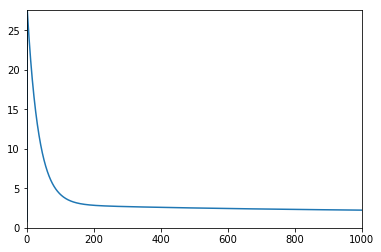

In [12]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

MSE: 2.3822


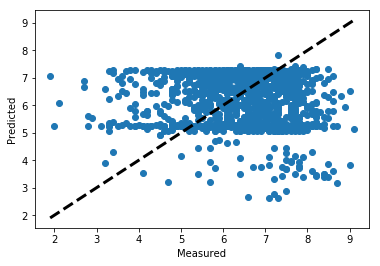

In [13]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<a id='tag2'></a>
### Feature selection + linear regression

* Features: numerical features which correlation coefficient > 0.1 or < -0.1
* Linear regression
* MSE: 1.45

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from subprocess import check_output


data = pd.read_csv("movie_metadata.csv")

select = np.where(data.select_dtypes(['int64', 'float64']).corr()['imdb_score'] > 0.1)

## add negatively correlated
select_col = data.select_dtypes(['int64', 'float64']).columns[select].tolist()

select_col.append('title_year')

scaler = Normalizer()

data_features_raw = scaler.fit_transform(data[select_col].fillna(0)).astype('float32')
data_features_raw = pd.DataFrame(data_features_raw, columns=select_col)
data_features_raw.dtypes

#data_features_raw = data[select_col].copy().fillna(0)
data_labels_raw = data[["imdb_score"]].copy().fillna(0).astype('float32')

#split = 4000
data_features_train_raw, data_features_test_raw, data_labels_train_raw, data_labels_test_raw =\
train_test_split(data_features_raw, data_labels_raw)


n_dim = data_features_raw.shape[1]
rnd_indices = np.random.rand(len(data_features_raw)) < 0.80


train_x = np.array(data_features_train_raw)
train_y = np.array(data_labels_train_raw)
test_x = np.array(data_features_test_raw)
test_y = np.array(data_labels_test_raw)

learning_rate = 0.01 #changed
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.global_variables_initializer()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
     

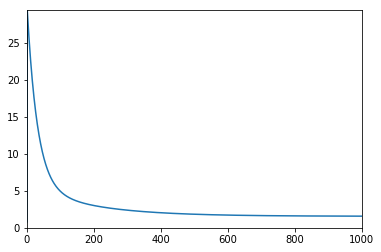

In [15]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

MSE: 1.5334


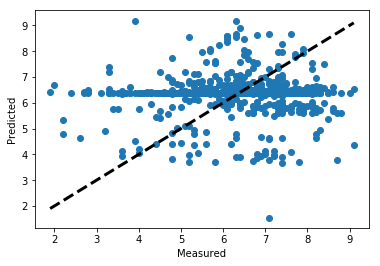

In [16]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<a id='tag3'></a>
### Categorical features- linear regression

* Features: added categorical features (country, language) and genres1 (first word in the genere feature), added the ***rgb value*** extracted from the major color of ***movie poster***
* Reduced the dimension of categorical features by only encode the top 10 of each categories
* One-hot encode the categorical features 
* Feature selection: used selectK best to get ***40 features***
* Model linear regression
* MSE: 0.94

In [17]:
data = pd.read_csv("movie_metadata2.csv")
rgb = pd.read_csv('kmeans_color.csv')
cluster1_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 0]) for i in range(len(rgb))])
cluster2_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 1]) for i in range(len(rgb))])
cluster3_rgb = pd.DataFrame([colors.hex2color(rgb.iloc[i, 2]) for i in range(len(rgb))])

In [18]:
drop_col = ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link','content_rating']

In [19]:
data= data.drop(drop_col, axis=1)

In [20]:
data_merge = pd.concat([data, cluster1_rgb, cluster2_rgb, cluster3_rgb], \
                axis = 1, ignore_index = True)

In [21]:
data_merge.columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'genres1', 'rgb1', 'rgb2', 'rgb3', 'rgb4', 'rgb5', 'rgb6', 'rgb7', 'rgb8', 'rgb9']
data = data_merge

In [22]:
## reduce language and country categories
countries_top = data.country.value_counts()[:10].index
language_top = data.language.value_counts()[:10].index

In [23]:
data['lanague_new'] = data.language.where(data.language.isin(language_top), 'other_lan')

In [24]:
data['country_new'] = data.country.where(data.country.isin(countries_top), 'other_co')

In [25]:
data = data.drop(['language', 'country'], axis=1)

In [26]:
data = pd.get_dummies(data)

In [27]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn import linear_model

In [28]:
## select features using select K best
reg = linear_model.LinearRegression()

In [29]:
model = pipeline.Pipeline([ 
    ('selectK',  SelectKBest(k=40)),  
    ('reg', reg)
])

In [30]:
N_FEATURES_OPTIONS = [30, 40, 50]

param_grid = [
    {
        'selectK__k': N_FEATURES_OPTIONS
    },
]

In [31]:
data_features_all = data.drop('imdb_score', axis=1)
data_target = data.imdb_score
data_features_all.shape, data_target.shape

((5043, 67), (5043,))

In [32]:
data_features_all = data_features_all.fillna(0)

In [33]:
data_features_train_raw, data_features_test_raw, data_labels_train_raw, data_labels_test_raw =\
train_test_split(data_features_all, data_target, train_size = .8,)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [34]:
data_features_train_raw.shape, data_features_test_raw.shape

((4034, 67), (1009, 67))

In [35]:
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(model, cv=2, n_jobs=1, param_grid=param_grid)


In [37]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country_new_Canada,country_new_China,country_new_France,country_new_Germany,country_new_India,country_new_Italy,country_new_Spain,country_new_UK,country_new_USA,country_new_other_co
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,0,0,0,1,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,0,0,0,1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,0,0,1,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,0,0,0,1,0
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [38]:
grid.fit(data_features_train_raw, data_labels_train_raw)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [34 35 38] are constant.
  UserWarning)
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [35 36] are constant.
  UserWarning)
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/site-

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=40, score_func=<function f_classif at 0x11d91a048>)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'selectK__k': [30, 40, 50]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [39]:
grid.best_params_

{'selectK__k': 30}

In [40]:
sel_k = model.named_steps['selectK']
sel_k.fit(data_features_train_raw, data_labels_train_raw)
nice_col = sel_k.get_support(indices= True)
len(nice_col)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [35] are constant.
  UserWarning)
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


40

In [41]:
nice_name = data_features_train_raw.columns[nice_col]
nice_name

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'rgb7', 'rgb8', 'rgb9',
       'genres1_Action', 'genres1_Biography', 'genres1_Comedy',
       'genres1_Crime', 'genres1_Documentary', 'genres1_Drama',
       'genres1_Family', 'genres1_Horror', 'genres1_Sci-Fi',
       'genres1_Thriller', 'genres1_Western', 'lanague_new_English',
       'lanague_new_German', 'lanague_new_Hindi', 'lanague_new_Italian',
       'lanague_new_Japanese', 'lanague_new_other_lan', 'country_new_Canada',
       'country_new_India', 'country_new_Italy', 'country_new_UK',
       'country_new_USA', 'country_new_other_co'],
      dtype='object')

In [42]:
y_pred = grid.predict(data_features_test_raw)

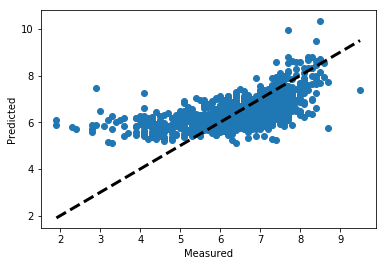

In [51]:

fig, ax = plt.subplots()
ax.scatter(data_labels_test_raw, y_pred)
ax.plot([data_labels_test_raw.min(), data_labels_test_raw.max()],\
        [data_labels_test_raw.min(), data_labels_test_raw.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(data_labels_test_raw, y_pred)

0.80448025921587007

<a id='tag4'></a>
### Add categorical features + ridge regression

* Features: added categorical features (country, language) and genres1 (first word in the genere feature), added the ***rgb value*** extracted from the major color of ***movie poster***
* Reduced the dimension of categorical features by only encode the top 10 of each categories
* One-hot encode the categorical features 
* Feature selection: used selectK best to get ***40 features***
* Model: ridge regression
* MSE: 0.73


In [46]:
init = tf.global_variables_initializer()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    
    

In [47]:
from sklearn.linear_model import Ridge

In [48]:
model = pipeline.Pipeline([ 
    ('selectK',  SelectKBest(k=40)),  
    ('reg', Ridge())
])

In [49]:
model.fit(data_features_train_raw, data_labels_train_raw)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [35] are constant.
  UserWarning)
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0398589047292646e-19 / 1.1102230246251565e-16
  RuntimeWarning)


Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=40, score_func=<function f_classif at 0x11d91a048>)), ('reg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

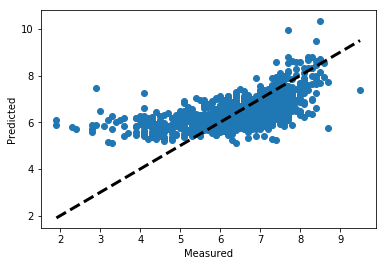

In [50]:
#y_pred = model.predict(data_features_test_raw)
#plt.scatter(y_pred, data_labels_test_raw)

fig, ax = plt.subplots()
ax.scatter(data_labels_test_raw, y_pred)
ax.plot([data_labels_test_raw.min(), data_labels_test_raw.max()],\
        [data_labels_test_raw.min(), data_labels_test_raw.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [61]:
mean_squared_error(data_labels_test_raw, y_pred)

0.73125751620908941